<a href="https://colab.research.google.com/github/Kiran-velan/Traffic-Volume-Prediction/blob/main/Traffic_Prediction_Team_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Traffic Prediction



# Overview
In this project, we explored a dataset of vehicles on 4 junctions at different times and built a model to predict the traffic. This could potentially help in solving the traffic congestion problem by providing a better understanding of traffic patterns.

# Data Loading and Preprocessing



Importing all required Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
import datetime
import tensorflow as tf
from tensorflow import keras
from keras import optimizers
import itertools
from itertools import product

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing the Dataset

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/traffic.csv')
df = pd.DataFrame(dataset)
print(df.dtypes)
df.head()

DateTime    object
Junction     int64
Vehicles     int64
ID           int64
dtype: object


,DateTime,Junction,Vehicles,ID
0,2015-11-01 0:00:00,1,15,20151101001
1,2015-11-01 1:00:00,1,13,20151101011
2,2015-11-01 2:00:00,1,10,20151101021
3,2015-11-01 3:00:00,1,7,20151101031
4,2015-11-01 4:00:00,1,9,20151101041


:The ID consists of the Date and Time in a concatenated format as YYYYMMDDHHJ.
* YYYY is for Year
* MM is for month
* DD is for Date
* HH is for Hour
* J is for Junction Number

Hence, we split the ID column into the Year, Month, Date, Hour and Junction




In [ ]:
df["DateTime"]= pd.to_datetime(df["DateTime"])
df["Year"]= df['DateTime'].dt.year
df["Month"]= df['DateTime'].dt.month
df["Date"]= df['DateTime'].dt.day
df["Hour"]= df['DateTime'].dt.hour
df["Day"]= df.DateTime.dt.strftime("%A")
df.head()

,DateTime,Junction,Vehicles,ID,Year,Month,Date,Hour,Day
0,2015-11-01 00:00:00,1,15,20151101001,2015,11,1,0,Sunday
1,2015-11-01 01:00:00,1,13,20151101011,2015,11,1,1,Sunday
2,2015-11-01 02:00:00,1,10,20151101021,2015,11,1,2,Sunday
3,2015-11-01 03:00:00,1,7,20151101031,2015,11,1,3,Sunday
4,2015-11-01 04:00:00,1,9,20151101041,2015,11,1,4,Sunday


**Plotting Variation of Vehicles with Time for each Junction**

Text(0.5, 0, 'Date')

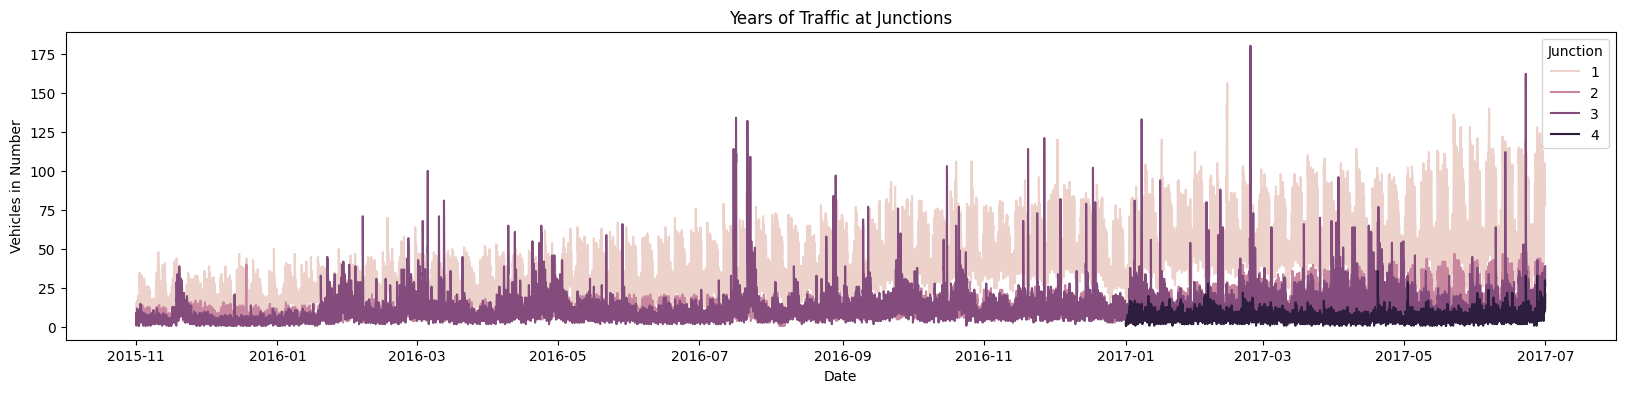

In [ ]:
colors = [ "#FFD4DB","#BBE7FE","#D3B5E5","#dfe2b6"]
plt.figure(figsize=(20,4))
Time_series=sns.lineplot(x=df['DateTime'],y="Vehicles",data=df, hue="Junction")
Time_series.set_title("Years of Traffic at Junctions")
Time_series.set_ylabel("Vehicles in Number")
Time_series.set_xlabel("Date")

**Observations:**

*   Junction 1 is the busiest everyday.
*   Junction 3 is busy periodically.
*   Junction 4 started operations in 2017.
*   We only have data till the 7th Month of 2017.



**Plotting Variation of Vehicles with each feature for each junction.**

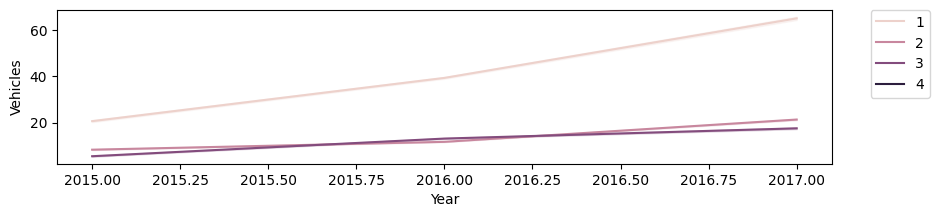

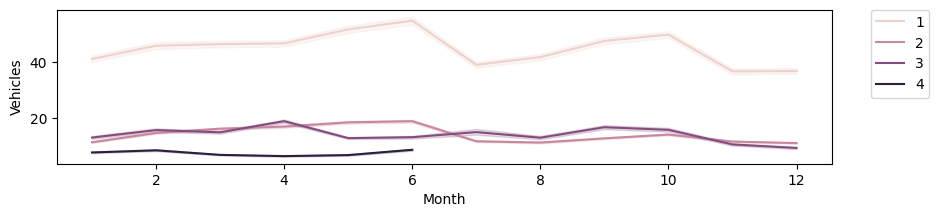

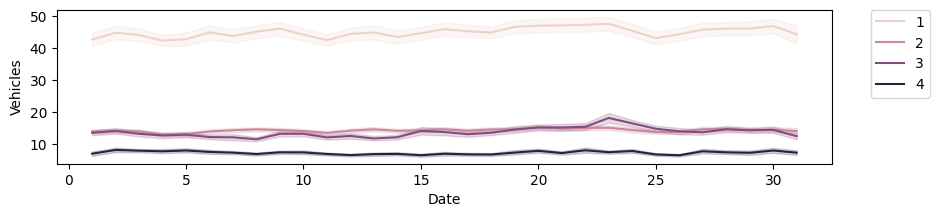

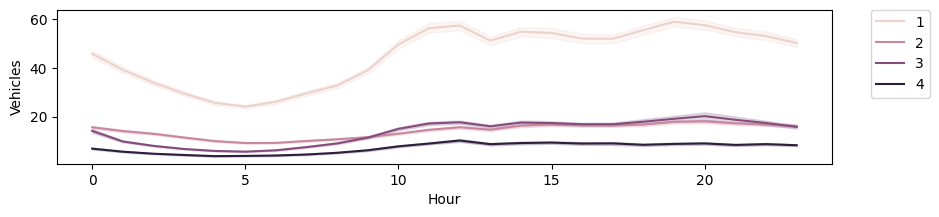

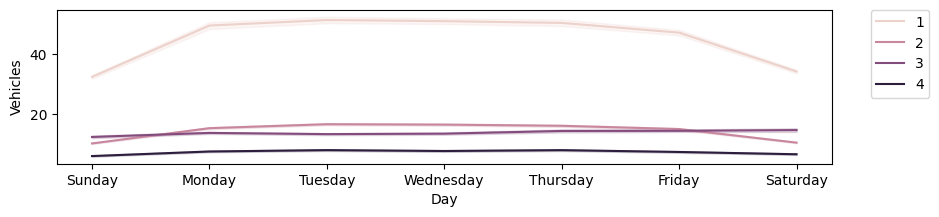

In [ ]:
new_features = [ "Year","Month", "Date", "Hour", "Day"]
for i in new_features:
    plt.figure(figsize=(10,2))
    ax=sns.lineplot(x=df[i],y="Vehicles",data=df, hue="Junction")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

**Observations:**

*   As observed before, Junction 1 is the busiest everyday but traffic decreases on weekends.
*   Traffic is consistent from Monday to Friday.
*   All junctions have shown a rising yearly tendency except Junction 4. This could be due to the fact that it started operations in 2017.
*   From 00 to 10 Hours, there is low Traffic because those are sleeping hours.



In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
a = le.fit_transform(df['Day'])
np.unique(a)
df['Day_enc'] = a

In [ ]:
df_1 = df.loc[df['Junction']==1]
df_2 = df.loc[df['Junction']==2]
df_3 = df.loc[df['Junction']==3]
df_4 = df.loc[df['Junction']==4]

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df_1['Vehicles'] = scaler.fit_transform(df_1['Vehicles'].to_numpy().reshape(-1,1))
df_2['Vehicles'] = scaler.fit_transform(df_2['Vehicles'].to_numpy().reshape(-1,1))
df_3['Vehicles'] = scaler.fit_transform(df_3['Vehicles'].to_numpy().reshape(-1,1))
df_4['Vehicles'] = scaler.fit_transform(df_4['Vehicles'].to_numpy().reshape(-1,1))    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

<ipython-input-9-44015219119a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['Vehicles'] = scaler.fit_transform(df_1['Vehicles'].to_numpy().reshape(-1,1))
<ipython-input-9-44015219119a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['Vehicles'] = scaler.fit_transform(df_2['Vehicles'].to_numpy().reshape(-1,1))
<ipython-input-9-44015219119a>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See

In [ ]:
diff_1 = df_1['Vehicles'].diff(periods = -1)
diff_2 = df_2['Vehicles'].diff(periods = -1)
diff_3 = df_3['Vehicles'].diff(periods = -1)
diff_4 = df_4['Vehicles'].diff(periods = -1)
df_1['diff'] = diff_1
df_2['diff'] = diff_2
df_3['diff'] = diff_3
df_4['diff'] = diff_4

<ipython-input-10-5db8ca4b874f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_1['diff'] = diff_1
<ipython-input-10-5db8ca4b874f>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['diff'] = diff_2
<ipython-input-10-5db8ca4b874f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

In [ ]:
df_1= df_1.dropna()
df_2= df_2.dropna()
df_3= df_3.dropna()
df_4= df_4.dropna()

[Text(0, 0.5, 'Junction 4')]

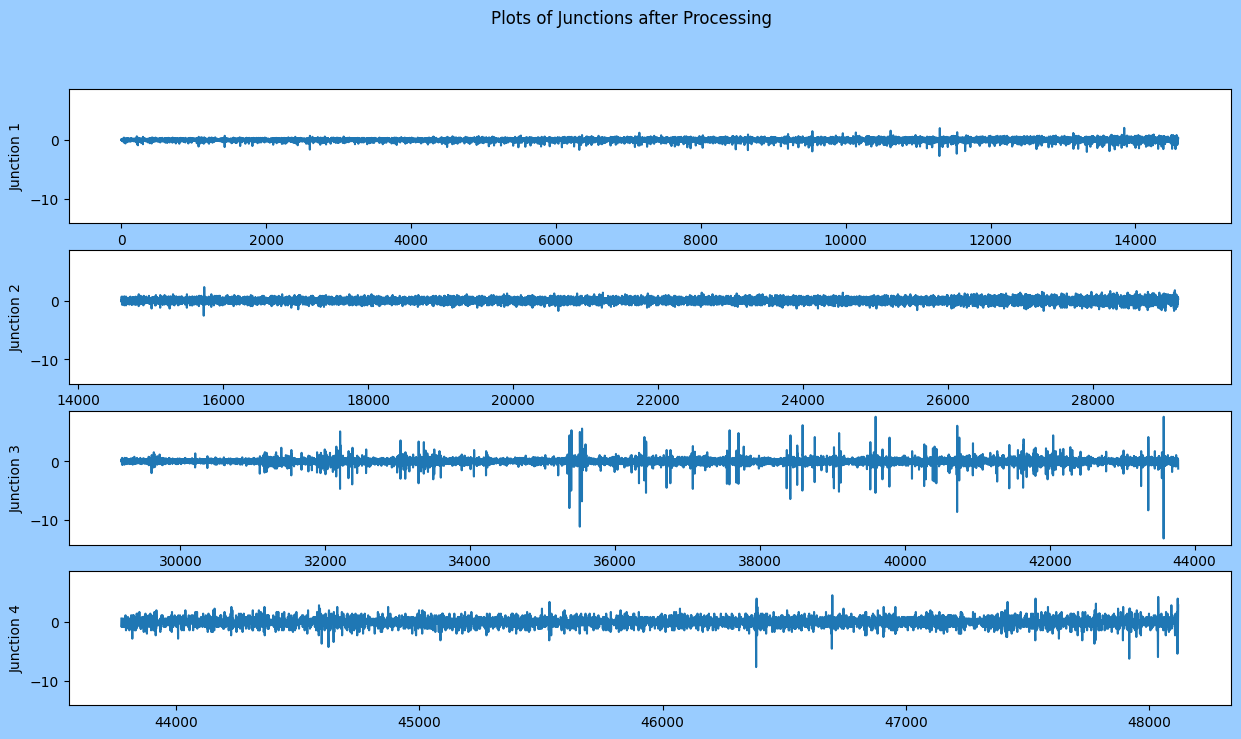

In [ ]:

pl_2=sns.lineplot(ax=axes[1],data=df_2['diff'])
axes[1].set(ylabel ="Junction 2")

pl_3=sns.lineplot(ax=axes[2],data=df_3['diff'])
axes[2].set(ylabel ="Junction 3")

pl_4=sns.lineplot(ax=axes[3],data=df_4['diff'])
axes[3].set(ylabel ="Junction 4")
#,color=colors[0]

In [ ]:
x_1 = df_1[['Year','Month','Date','Hour','Day_enc','Junction']]
y_1 = df_1['diff']
x_2 = df_2[['Year','Month','Date','Hour','Day_enc','Junction']]
y_2 = df_2['diff']
x_3 = df_3[['Year','Month','Date','Hour','Day_enc','Junction']]
y_3 = df_3['diff']
x_4 = df_4[['Year','Month','Date','Hour','Day_enc','Junction']]
y_4 = df_4['diff']    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

In [ ]:
from sklearn.model_selection import train_test_split
x1_train,x1_test,y1_train,y1_test = train_test_split(x_1,y_1,test_size= 0.1, random_state = 69)
x2_train,x2_test,y2_train,y2_test = train_test_split(x_2,y_2,test_size= 0.1, random_state = 69)
x3_train,x3_test,y3_train,y3_test = train_test_split(x_3,y_3,test_size= 0.1, random_state = 69)
x4_train,x4_test,y4_train,y4_test = train_test_split(x_4,y_4,test_size= 0.1, random_state = 69)

Defining a Mean Squared Error Function

In [ ]:
def MSE(arr1, arr2):
  MSE = 0
  mse = 0
  # print(MSE)
  for i in range(len(arr1)):
    MSE = MSE + ((arr1[i] - arr2[i])**2)

  for i in range(len(MSE)):
    mse = mse + MSE[i]

  mse = mse/len(MSE)

  return mse/len(arr1)

Defining a Function to generate a list of random numbers

In [ ]:
import random
def Random_List_Generator(trials, max):
  randomList=[]
  for i in range(trials):
   r=random.randint(1, max)
   if r not in randomList:
      randomList.append(r)
  return randomList

Defining a Function to perform Hyperparameter Tuning using Random Search from scratch.

In [ ]:
def Model(parameters, trials, n_epochs, x_train, x_test, y_train, y_test, Mode = 0):
  layers, neurons, batch_size, dropout, learning_rate = parameters
  possible = list(itertools.product(layers, neurons, batch_size, dropout, learning_rate))
  randList = Random_List_Generator(trials, len(possible))
  counter = 0
  best = 0
  best_mse = 1.00
  for i in range(len(randList)):
    current = possible[randList[i]]
    model = tf.keras.Sequential()
    print(f"Iteration: {i}")
    print(f"Current Parameters: {current}")
    print(f"Current Best Parameters: {possible[best]}")

    # Model Layer Building
    for j in range(current[0]-1):
        model.add(tf.keras.layers.LSTM(units=int(abs(current[1]/(j+1))), return_sequences=True,input_shape=(x_train.shape[1],1), activation='tanh'))
        model.add(tf.keras.layers.Dropout(current[3]))
    model.add(tf.keras.layers.LSTM(units=int(abs(current[1]/(current[0]))), return_sequences=False,input_shape=(x_train.shape[1],1), activation='tanh'))
    model.add(tf.keras.layers.Dropout(current[3]))
    model.add(tf.keras.layers.Dense(units=1))

    # Model Compilation, Fitting, and Prediction
    model.compile(optimizer=optimizers.Adam(learning_rate=current[4]), loss='mean_squared_error')
    model.fit(x_train,y_train, validation_data=(x_test, y_test), epochs=n_epochs, batch_size=current[2])
    y_pred = model.predict(x_test)
    model.reset_states()

    # Calculating Loss
    mse = MSE(y_test.to_numpy(), y_pred)
    print(f"Current MSE Value: {mse}")

    # Updating Value for Best MSE
    if mse < best_mse:
      best_mse = mse
      best = randList[i]

    if Mode == 1:
      return y_pred
      break

  return [possible[best], best_mse]

In [ ]:
## This Code is for Testing HyperTuning

# layers = [4]
# neurons = [150]
# batch_size = [120]
# dropout = [0.2]
# learning_rate = [0.001, 0.002, 0.003, 0.01]
# params = [layers, neurons, batch_size, dropout, learning_rate]
# no_of_trials = 4
# no_of_epochs = 1
# Tuned_Values = Model(params, no_of_trials, no_of_epochs, x1_train, x1_test, y1_train, y1_test)
# print(Tuned_Values[1])

Defining a Function to plot predictions

In [ ]:
def PredictionsPlot(test,predicted,m):
    plt.figure(figsize=(12,5))
    plt.plot(test.to_numpy().reshape((len(predicted),1)), color=colors[m],label="True Value",alpha=0.5 )
    plt.plot(predicted, color="#627D78",label="Predicted Values")
    plt.title("Traffic Prediction Vs True values")
    plt.xlabel("DateTime")
    plt.ylabel("Number of Vehicles")
    plt.legend()
    plt.show()

Training our "Model" using Hyper Parameters.

In [ ]:
# This is for the Final Submission. Run this before Submission
layers = [2, 3]
neurons = [30, 50, 70, 90, 110]
batch_size = [20, 40, 60, 80, 100, 120]
dropout = [0.01, 0.2, 0.5]
learning_rate = [0.001, 0.003, 0.01, 0.02]
params = [layers, neurons, batch_size, dropout, learning_rate]
no_of_trials = 75
no_of_epochs = 4

In [ ]:
Tuned_Values1 = Model(params, no_of_trials, no_of_epochs, x1_train, x1_test, y1_train, y1_test)

Iteration: 0
Current Parameters: (2, 110, 60, 0.2, 0.001)
Current Best Parameters: (2, 110, 60, 0.2, 0.001)
Epoch 1/10
219/219 [==============================] - 9s 25ms/step - loss: 0.0760 - val_loss: 0.0665
Epoch 2/10
219/219 [==============================] - 6s 27ms/step - loss: 0.0680 - val_loss: 0.0658
Epoch 3/10
219/219 [==============================] - 4s 18ms/step - loss: 0.0629 - val_loss: 0.0566
Epoch 4/10
219/219 [==============================] - 4s 17ms/step - loss: 0.0588 - val_loss: 0.0584
Epoch 5/10
219/219 [==============================] - 6s 26ms/step - loss: 0.0567 - val_loss: 0.0563
Epoch 6/10
219/219 [==============================] - 5s 22ms/step - loss: 0.0553 - val_loss: 0.0552
Epoch 7/10
219/219 [==============================] - 4s 17ms/step - loss: 0.0549 - val_loss: 0.0544
Epoch 8/10
219/219 [==============================] - 4s 18ms/step - loss: 0.0542 - val_loss: 0.0550
Epoch 9/10
219/219 [==============================] - 7s 30ms/step - loss: 0.0534 - 

In [ ]:
Tuned_Values2 = Model(params, no_of_trials, no_of_epochs, x2_train, x2_test, y2_train, y2_test)

Iteration: 0
Current Parameters: (3, 50, 60, 0.01, 0.02)
Current Best Parameters: (2, 50, 20, 0.01, 0.001)
Epoch 1/4
219/219 [==============================] - 13s 31ms/step - loss: 0.1640 - val_loss: 0.1654
Epoch 2/4
219/219 [==============================] - 4s 17ms/step - loss: 0.1547 - val_loss: 0.1622
Epoch 3/4
219/219 [==============================] - 3s 15ms/step - loss: 0.1521 - val_loss: 0.1586
Epoch 4/4
46/46 [==============================] - 2s 7ms/step
Current MSE Value: 0.15981817376123716
Iteration: 1
Current Parameters: (3, 130, 60, 0.2, 0.001)
Current Best Parameters: (3, 50, 60, 0.01, 0.02)
Epoch 1/4
219/219 [==============================] - 16s 39ms/step - loss: 0.1615 - val_loss: 0.1723
Epoch 2/4
219/219 [==============================] - 9s 42ms/step - loss: 0.1580 - val_loss: 0.1627
Epoch 3/4
219/219 [==============================] - 7s 30ms/step - loss: 0.1560 - val_loss: 0.1590
Epoch 4/4
46/46 [==============================] - 1s 7ms/step
Current MSE Value: 

In [ ]:
Tuned_Values3 = Model(params, no_of_trials, no_of_epochs, x3_train, x3_test, y3_train, y3_test)

Iteration: 0
Current Parameters: (5, 110, 40, 0.5, 0.01)
Current Best Parameters: (2, 110, 20, 0.2, 0.001)
Epoch 1/3
329/329 [==============================] - 29s 44ms/step - loss: 0.3179 - val_loss: 0.2868
Epoch 2/3
329/329 [==============================] - 10s 30ms/step - loss: 0.3161 - val_loss: 0.2881
Epoch 3/3
46/46 [==============================] - 4s 9ms/step
Current Best Parameters: 0.2867349912042487
Iteration: 1
Current Parameters: (2, 130, 60, 0.3, 0.01)
Current Best Parameters: (5, 110, 40, 0.5, 0.01)
Epoch 1/3
219/219 [==============================] - 12s 33ms/step - loss: 0.3281 - val_loss: 0.2807
Epoch 2/3
219/219 [==============================] - 12s 56ms/step - loss: 0.3063 - val_loss: 0.2834
Epoch 3/3
46/46 [==============================] - 2s 10ms/step
Current Best Parameters: 0.27651806138966184
Iteration: 2
Current Parameters: (5, 110, 40, 0.2, 0.001)
Current Best Parameters: (2, 130, 60, 0.3, 0.01)
Epoch 1/3
329/329 [==============================] - 27s 50m

KeyboardInterrupt: ignored

In [ ]:
# This is for the Final Submission. Run this before Submission
layers = [2, 3]
neurons = [30, 50, 70, 90]
batch_size = [10, 20, 40, 60]
dropout = [0.01, 0.1, 0.2]
learning_rate = [0.001, 0.003, 0.01, 0.02]
params = [layers, neurons, batch_size, dropout, learning_rate]
no_of_trials = 5
no_of_epochs = 4

In [ ]:
Tuned_Values4 = Model(params, no_of_trials, no_of_epochs, x4_train, x4_test, y4_train, y4_test)

Iteration: 0
Current Parameters: (3, 30, 20, 0.01, 0.003)
Current Best Parameters: (2, 30, 10, 0.01, 0.001)
Epoch 1/4
196/196 [==============================] - 12s 25ms/step - loss: 0.7503 - val_loss: 0.6670
Epoch 2/4
196/196 [==============================] - 3s 13ms/step - loss: 0.7433 - val_loss: 0.6674
Epoch 3/4
196/196 [==============================] - 2s 12ms/step - loss: 0.7418 - val_loss: 0.6618
Epoch 4/4
14/14 [==============================] - 3s 8ms/step
Current MSE Value: 0.658093121408046
Iteration: 1
Current Parameters: (3, 90, 40, 0.1, 0.003)
Current Best Parameters: (3, 30, 20, 0.01, 0.003)
Epoch 1/4
98/98 [==============================] - 18s 51ms/step - loss: 0.7528 - val_loss: 0.6711
Epoch 2/4
98/98 [==============================] - 2s 24ms/step - loss: 0.7484 - val_loss: 0.6640
Epoch 3/4
98/98 [==============================] - 2s 20ms/step - loss: 0.7420 - val_loss: 0.6584
Epoch 4/4
14/14 [==============================] - 1s 6ms/step
Current MSE Value: 0.66706

In [ ]:
print(f"Best Parameters for Junction 1 are: {Tuned_Values1[0]}")
print(f"Best Parameters for Junction 2 are: {Tuned_Values2[0]}")
print(f"Best Parameters for Junction 3 are: {Tuned_Values3[0]}")
print(f"Best Parameters for Junction 4 are: {Tuned_Values4[0]}")

Best Parameters for Junction 1 are: (2, 110, 60, 0.2, 0.001)
Best Parameters for Junction 2 are: (2, 110, 60, 0.2, 0.001)
Best Parameters for Junction 3 are: (2, 110, 60, 0.2, 0.001)
Best Parameters for Junction 4 are: (2, 110, 60, 0.2, 0.001)


In [ ]:
params = []
for i in range(5):
  params.append([Tuned_Values1[0][i]])
no_of_epochs = 60
predicted_1 = Model(params, 1, no_of_epochs, x1_train, x1_test, y1_train, y1_test, 1)

Iteration: 0
Current Parameters: (2, 110, 60, 0.2, 0.001)
Current Best Parameters: (2, 110, 60, 0.2, 0.001)
Epoch 1/75
219/219 [==============================] - 11s 22ms/step - loss: 0.0759 - val_loss: 0.0661
Epoch 2/75
219/219 [==============================] - 4s 20ms/step - loss: 0.0664 - val_loss: 0.0581
Epoch 3/75
219/219 [==============================] - 6s 28ms/step - loss: 0.0591 - val_loss: 0.0574
Epoch 4/75
219/219 [==============================] - 5s 22ms/step - loss: 0.0567 - val_loss: 0.0565
Epoch 5/75
219/219 [==============================] - 4s 18ms/step - loss: 0.0550 - val_loss: 0.0543
Epoch 6/75
219/219 [==============================] - 5s 21ms/step - loss: 0.0544 - val_loss: 0.0531
Epoch 7/75
219/219 [==============================] - 6s 28ms/step - loss: 0.0538 - val_loss: 0.0530
Epoch 8/75
219/219 [==============================] - 4s 17ms/step - loss: 0.0537 - val_loss: 0.0534
Epoch 9/75
219/219 [==============================] - 4s 18ms/step - loss: 0.0534 -

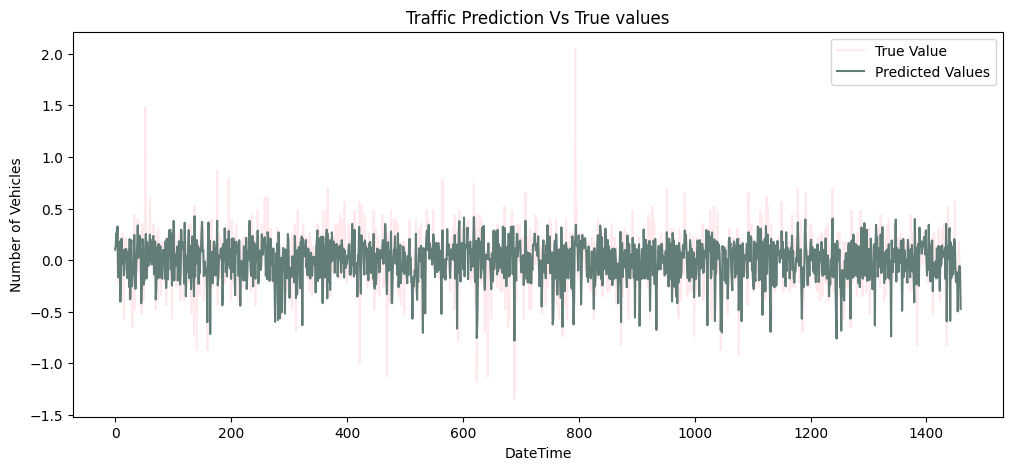

MSE value for Junction 1 is: 0.04341314916741358


In [ ]:
PredictionsPlot(y1_test,predicted_1,0)
print(f"MSE value for Junction 1 is: {Tuned_Values1[1]}")

In [ ]:
params = []
for i in range(5):
  params.append([Tuned_Values2[0][i]])

no_of_epochs = 60
predicted_2 = Model(params, 1, no_of_epochs, x2_train, x2_test, y2_train, y2_test, 1)

Iteration: 0
Current Parameters: (2, 110, 60, 0.2, 0.001)
Current Best Parameters: (2, 110, 60, 0.2, 0.001)
Epoch 1/75
219/219 [==============================] - 12s 35ms/step - loss: 0.1664 - val_loss: 0.1656
Epoch 2/75
219/219 [==============================] - 4s 20ms/step - loss: 0.1591 - val_loss: 0.1630
Epoch 3/75
219/219 [==============================] - 5s 21ms/step - loss: 0.1574 - val_loss: 0.1626
Epoch 4/75
219/219 [==============================] - 6s 26ms/step - loss: 0.1558 - val_loss: 0.1587
Epoch 5/75
219/219 [==============================] - 5s 22ms/step - loss: 0.1537 - val_loss: 0.1569
Epoch 6/75
219/219 [==============================] - 4s 17ms/step - loss: 0.1522 - val_loss: 0.1573
Epoch 7/75
219/219 [==============================] - 4s 18ms/step - loss: 0.1515 - val_loss: 0.1566
Epoch 8/75
219/219 [==============================] - 7s 33ms/step - loss: 0.1503 - val_loss: 0.1588
Epoch 9/75
219/219 [==============================] - 5s 21ms/step - loss: 0.1501 -

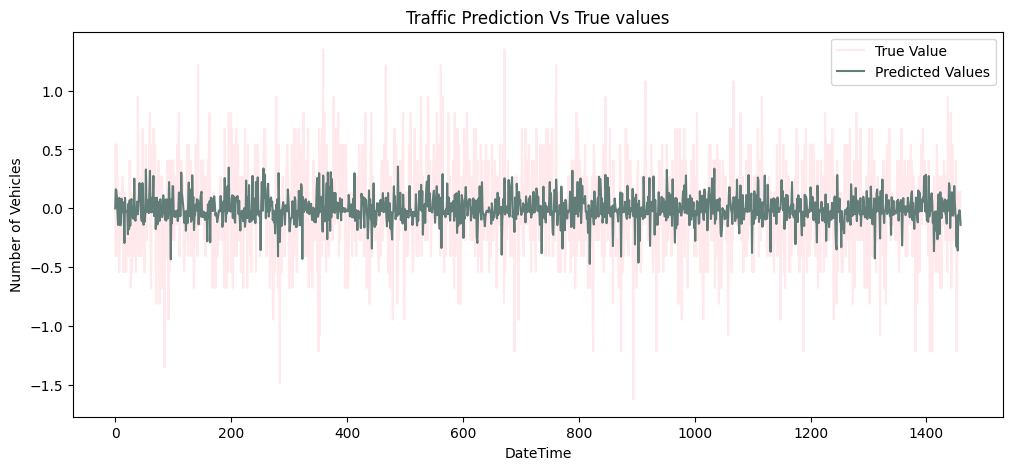

MSE value for Junction 2 is: 0.1583105635969606


In [ ]:
PredictionsPlot(y2_test,predicted_2,0)
print(f"MSE value for Junction 2 is: {Tuned_Values2[1]}")

In [ ]:
params = []
for i in range(5):
  params.append([Tuned_Values3[0][i]])
no_of_epochs = 60
predicted_3 = Model(params, 1, no_of_epochs, x3_train, x3_test, y3_train, y3_test, 1)

Iteration: 0
Current Parameters: (2, 110, 60, 0.2, 0.001)
Current Best Parameters: (2, 110, 60, 0.2, 0.001)
Epoch 1/75
219/219 [==============================] - 10s 21ms/step - loss: 0.3224 - val_loss: 0.2849
Epoch 2/75
219/219 [==============================] - 4s 19ms/step - loss: 0.3125 - val_loss: 0.2839
Epoch 3/75
219/219 [==============================] - 6s 29ms/step - loss: 0.3092 - val_loss: 0.2813
Epoch 4/75
219/219 [==============================] - 4s 18ms/step - loss: 0.3054 - val_loss: 0.2801
Epoch 5/75
219/219 [==============================] - 4s 18ms/step - loss: 0.3034 - val_loss: 0.2758
Epoch 6/75
219/219 [==============================] - 5s 24ms/step - loss: 0.3014 - val_loss: 0.2775
Epoch 7/75
219/219 [==============================] - 5s 24ms/step - loss: 0.3003 - val_loss: 0.2804
Epoch 8/75
219/219 [==============================] - 4s 17ms/step - loss: 0.2998 - val_loss: 0.2743
Epoch 9/75
219/219 [==============================] - 4s 17ms/step - loss: 0.3003 -

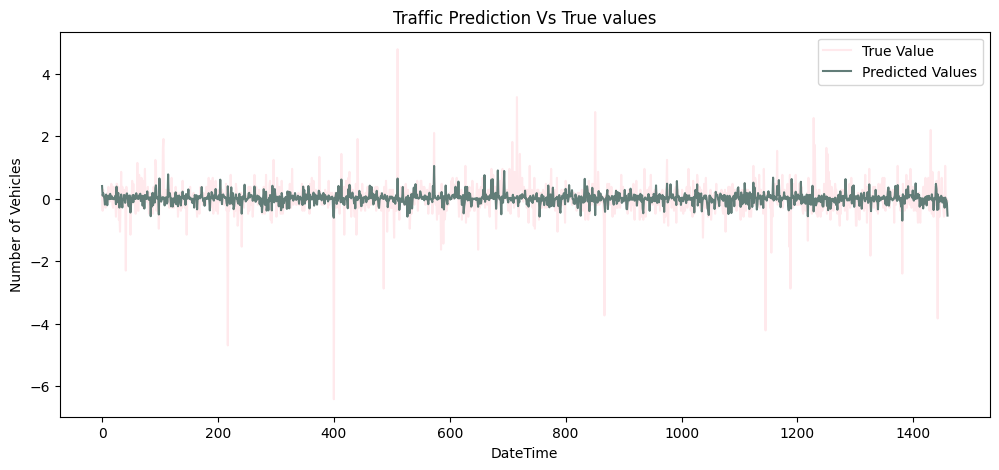

MSE value for Junction 3 is: 0.2737146037898652


In [ ]:
PredictionsPlot(y3_test,predicted_3,0)
print(f"MSE value for Junction 3 is: {Tuned_Values3[1]}")

In [ ]:
params = []
for i in range(5):
  params.append([Tuned_Values4[0][i]])
no_of_epochs = 60
predicted_4 = Model(params, 1, no_of_epochs, x4_train, x4_test, y4_train, y4_test, 1)

Iteration: 0
Current Parameters: (2, 110, 60, 0.2, 0.001)
Current Best Parameters: (2, 110, 60, 0.2, 0.001)
Epoch 1/75
66/66 [==============================] - 6s 30ms/step - loss: 0.7617 - val_loss: 0.6665
Epoch 2/75
66/66 [==============================] - 1s 17ms/step - loss: 0.7515 - val_loss: 0.6992
Epoch 3/75
66/66 [==============================] - 1s 18ms/step - loss: 0.7509 - val_loss: 0.6679
Epoch 4/75
66/66 [==============================] - 1s 20ms/step - loss: 0.7441 - val_loss: 0.6667
Epoch 5/75
66/66 [==============================] - 1s 22ms/step - loss: 0.7467 - val_loss: 0.6669
Epoch 6/75
66/66 [==============================] - 2s 30ms/step - loss: 0.7431 - val_loss: 0.6682
Epoch 7/75
66/66 [==============================] - 2s 31ms/step - loss: 0.7500 - val_loss: 0.6649
Epoch 8/75
66/66 [==============================] - 2s 31ms/step - loss: 0.7429 - val_loss: 0.6666
Epoch 9/75
66/66 [==============================] - 1s 18ms/step - loss: 0.7401 - val_loss: 0.6642
E

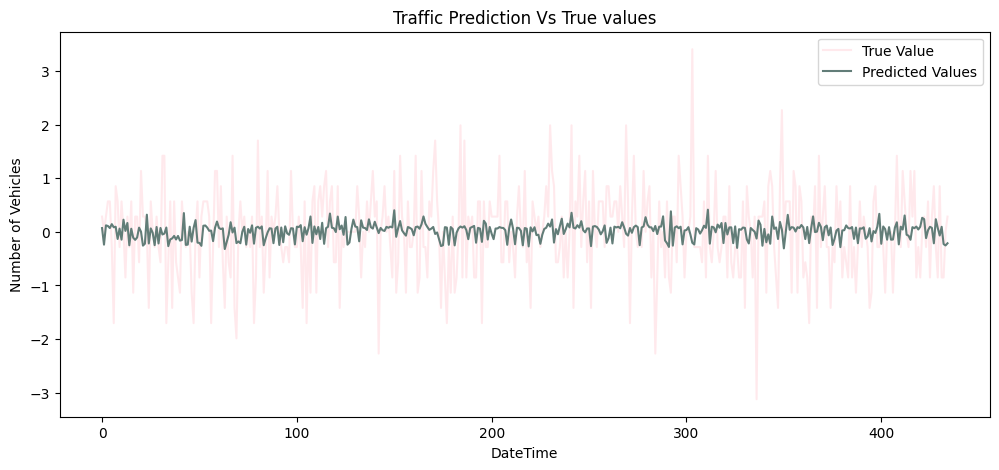

MSE value for Junction 4 is: 0.6594920191271552


In [ ]:
PredictionsPlot(y4_test,predicted_4,0)
print(f"MSE value for Junction 4 is: {Tuned_Values4[1]}")